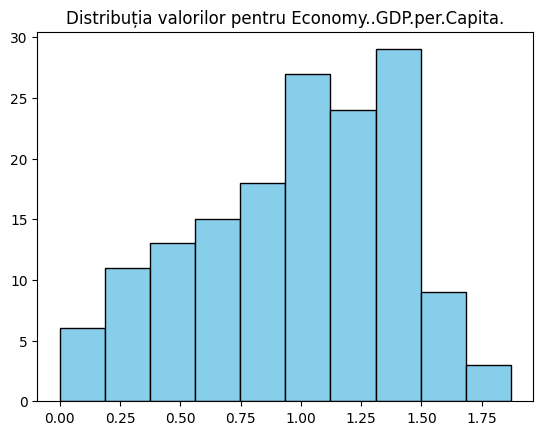

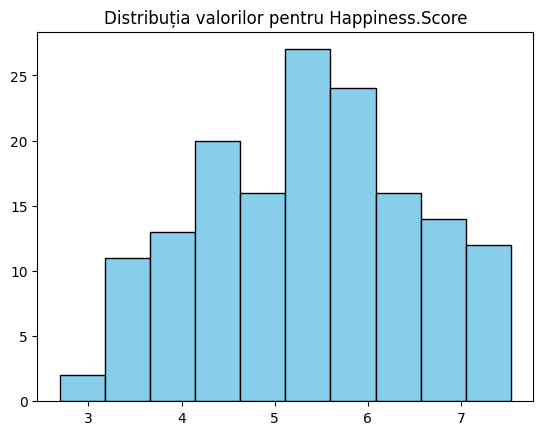

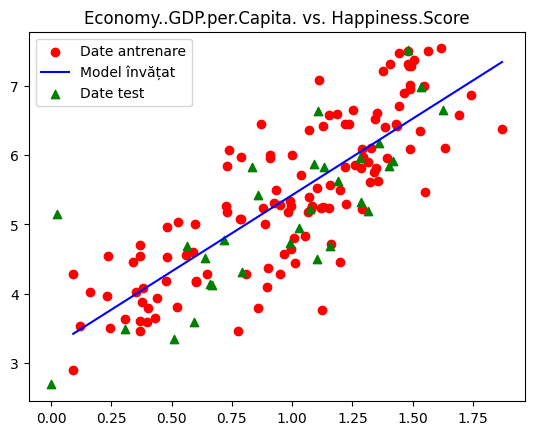

Eroare MSE pentru Economy..GDP.per.Capita.: 0.4862


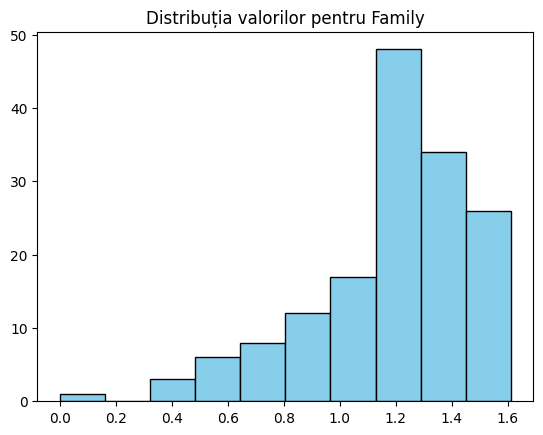

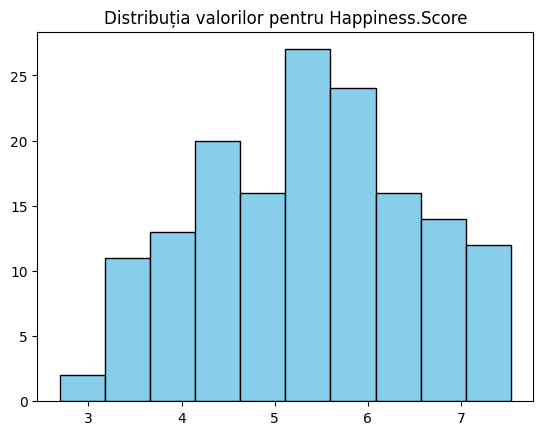

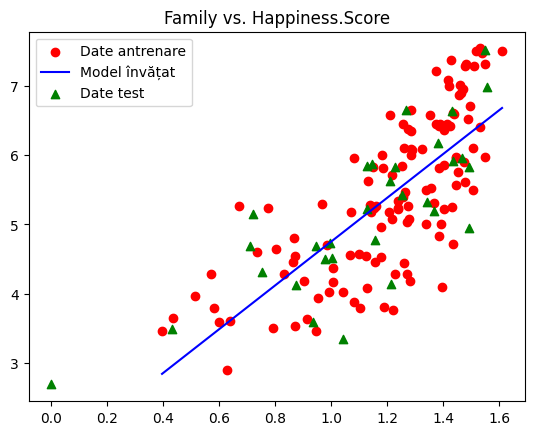

Eroare MSE pentru Family: 0.5171
Model: Happiness = 3.223 + -15595533.214*Economy..GDP.per.Capita. + 31191070.829*Freedom


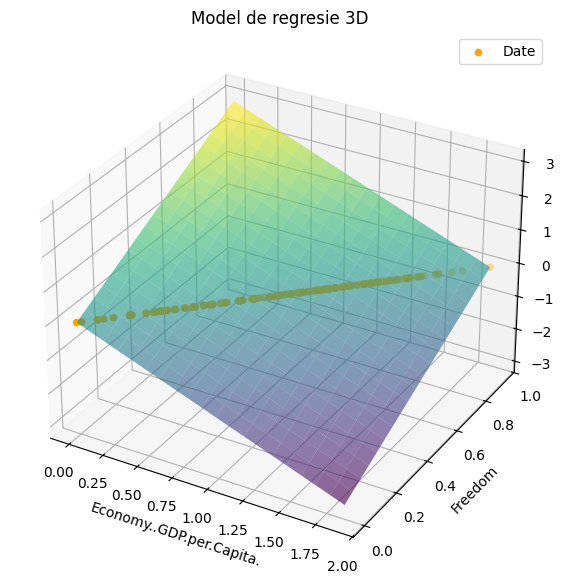

Eroare MSE multi-var: 0.4870


In [20]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

def citeste_csv(cale, coloana_x, coloana_y):
    with open(cale) as fisier:
        reader = csv.reader(fisier)
        antet = next(reader)
        date = list(reader)

    idx_x = antet.index(coloana_x)
    idx_y = antet.index(coloana_y)

    x = [float(linie[idx_x] or 0) for linie in date]
    y = [float(linie[idx_y] or 0) for linie in date]
    return x, y

def afiseaza_histograma(valori, nume):
    plt.hist(valori, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribuția valorilor pentru {nume}')
    plt.show()

def afiseaza_grafic(x_train, y_train, model=None, x_test=None, y_test=None, titlu=None):
    plt.scatter(x_train, y_train, color='red', label='Date antrenare')
    if model is not None:
        x_lin = np.linspace(min(x_train), max(x_train), 1000)
        y_lin = model.intercept_ + model.coef_[0] * x_lin
        plt.plot(x_lin, y_lin, color='blue', label='Model învățat')
    if x_test is not None:
        plt.scatter(x_test, y_test, color='green', marker='^', label='Date test')
    if titlu:
        plt.title(titlu)
    plt.legend()
    plt.show()

def regresie_univariata(cale, input_col, output_col):
    x, y = citeste_csv(cale, input_col, output_col)

    afiseaza_histograma(x, input_col)
    afiseaza_histograma(y, output_col)

    np.random.seed(42)
    index = np.arange(len(x))
    np.random.shuffle(index)
    n_train = int(0.8 * len(x))

    x_train = [x[i] for i in index[:n_train]]
    y_train = [y[i] for i in index[:n_train]]
    x_test = [x[i] for i in index[n_train:]]
    y_test = [y[i] for i in index[n_train:]]

    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1, 1), y_train)

    afiseaza_grafic(x_train, y_train, model, x_test, y_test, f'{input_col} vs. {output_col}')

    predictii = model.predict(np.array(x_test).reshape(-1, 1))
    eroare = mean_squared_error(y_test, predictii)
    print(f'Eroare MSE pentru {input_col}: {eroare:.4f}')

def regresie_multivariata(cale, col1, col2, target):
    x1, y = citeste_csv(cale, col1, target)
    x2, _ = citeste_csv(cale, col2, target)

    X = list(zip(x1, x2))

    np.random.seed(42)
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    n = int(0.8 * len(X))

    X_train = [X[i] for i in idx[:n]]
    y_train = [y[i] for i in idx[:n]]
    X_test = [X[i] for i in idx[n:]]
    y_test = [y[i] for i in idx[n:]]

    model = LinearRegression()
    model.fit(X_train, y_train)

    print(f"Model: Happiness = {model.intercept_:.3f} + {model.coef_[0]:.3f}*{col1} + {model.coef_[1]:.3f}*{col2}")

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y, color='orange', label='Date')

    x_surf = np.linspace(min(x1), max(x1), 20)
    y_surf = np.linspace(min(x2), max(x2), 20)
    X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
    Z_surf = model.intercept_ + model.coef_[0] * X_surf + model.coef_[1] * Y_surf
    ax.plot_surface(X_surf, Y_surf, Z_surf, cmap='viridis', alpha=0.6)

    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_zlabel(target)
    plt.title('Model de regresie 3D')
    plt.legend()
    plt.show()

    predictii = model.predict(X_test)
    eroare = mean_squared_error(y_test, predictii)
    print(f'Eroare MSE multi-var: {eroare:.4f}')

# Rulări pe fișiere
fisier = os.path.join('data', 'v2_world-happiness-report-2017.csv')
regresie_univariata(fisier, 'Economy..GDP.per.Capita.', 'Happiness.Score')
regresie_univariata(fisier, 'Family', 'Happiness.Score')
regresie_multivariata(fisier, 'Economy..GDP.per.Capita.', 'Freedom', 'Happiness.Score')


🔹 Regresie simplă: Happiness.Score în funcție de Economy..GDP.per.Capita.
Model: y = 2.1151 * x + 3.2397
MSE: 0.5372


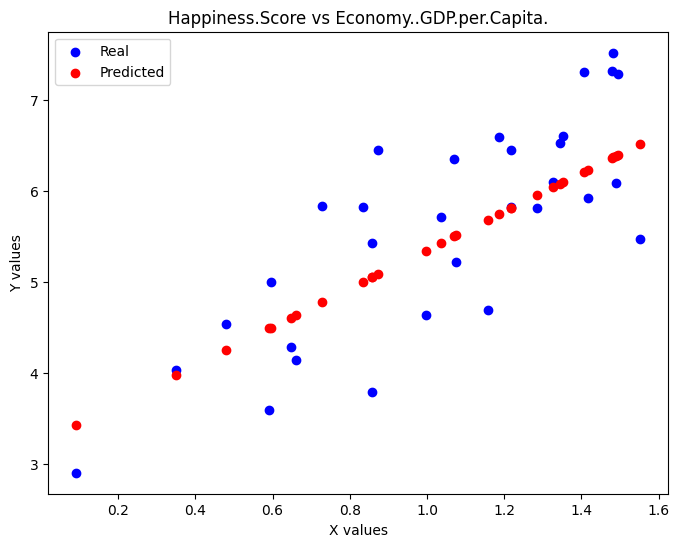


🔹 Regresie simplă: Happiness.Score în funcție de Family
Model: y = 0.3015 * x + 4.8395
MSE: 1.4551


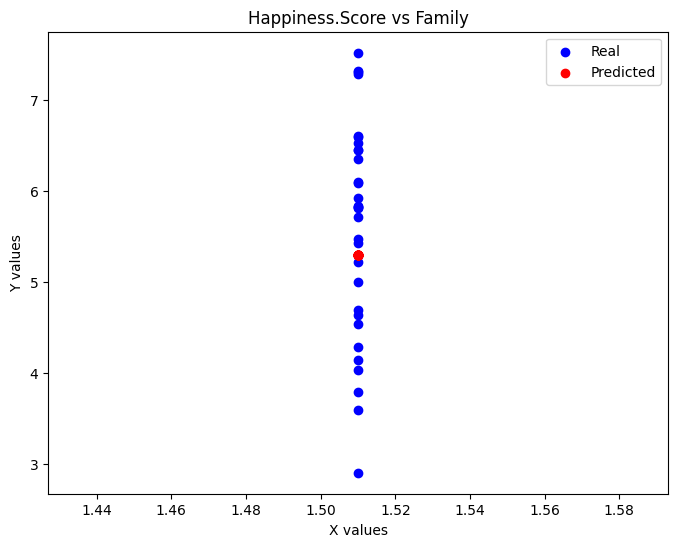


🔹 Regresie multiplă: Happiness.Score în funcție de Economy..GDP.per.Capita. și Freedom
Model: y = 1.9069 * Economy..GDP.per.Capita. + 2.1102 * Freedom + 2.5795
MSE: 0.3240


In [19]:
import csv
import random
import matplotlib.pyplot as plt


def citeste_date(fisier, *coloane):
    with open(fisier, 'r') as f:
        reader = csv.reader(f)
        antet = next(reader)
        date = list(reader)

    index_col = [antet.index(c) for c in coloane]
    valori = [[] for _ in coloane]

    for linie in date:
        for i, idx in enumerate(index_col):
            try:
                valori[i].append(float(linie[idx]) if linie[idx] else 0.0)
            except ValueError:
                valori[i].append(0.0)

    return valori

def imparte_date(x, y, procent_train=0.8):
    idx = list(range(len(x)))
    random.seed(42)
    random.shuffle(idx)
    n = int(len(x) * procent_train)

    x_train = [x[i] for i in idx[:n]]
    y_train = [y[i] for i in idx[:n]]
    x_test = [x[i] for i in idx[n:]]
    y_test = [y[i] for i in idx[n:]]
    return x_train, y_train, x_test, y_test

def regresie_liniara_simpla(x, y):
    n = len(x)
    medie_x = sum(x) / n
    medie_y = sum(y) / n

    num = sum((x[i] - medie_x) * (y[i] - medie_y) for i in range(n))
    den = sum((x[i] - medie_x) ** 2 for i in range(n))

    a = num / den
    b = medie_y - a * medie_x
    return a, b

def prezicere_simpla(x, a, b):
    return [a * xi + b for xi in x]

def eroare_mse(y_real, y_pred):
    n = len(y_real)
    return sum((y_real[i] - y_pred[i]) ** 2 for i in range(n)) / n

def regresie_univariata(fisier, x_col, y_col):
    x, y = citeste_date(fisier, x_col, y_col)
    x_train, y_train, x_test, y_test = imparte_date(x, y)

    a, b = regresie_liniara_simpla(x_train, y_train)
    y_pred = prezicere_simpla(x_test, a, b)
    mse = eroare_mse(y_test, y_pred)

    print(f"\n🔹 Regresie simplă: {y_col} în funcție de {x_col}")
    print(f"Model: y = {a:.4f} * x + {b:.4f}")
    print(f"MSE: {mse:.4f}")

    deseneaza_grafic_regresie_simpla(x_test, y_test, y_pred, f"{y_col} vs {x_col}")

def regresie_liniara_multipla(x1, x2, y):
    n = len(y)
    medie_x1 = sum(x1) / n
    medie_x2 = sum(x2) / n
    medie_y = sum(y) / n

    S_x1x1 = sum((x1[i] - medie_x1)**2 for i in range(n))
    S_x2x2 = sum((x2[i] - medie_x2)**2 for i in range(n))
    S_x1x2 = sum((x1[i] - medie_x1)*(x2[i] - medie_x2) for i in range(n))
    S_x1y = sum((x1[i] - medie_x1)*(y[i] - medie_y) for i in range(n))
    S_x2y = sum((x2[i] - medie_x2)*(y[i] - medie_y) for i in range(n))

    det = S_x1x1 * S_x2x2 - S_x1x2 ** 2
    if det == 0:
        return 0, 0, 0

    a1 = (S_x2x2 * S_x1y - S_x1x2 * S_x2y) / det
    a2 = (S_x1x1 * S_x2y - S_x1x2 * S_x1y) / det
    b = medie_y - a1 * medie_x1 - a2 * medie_x2

    return a1, a2, b

def prezicere_multipla(x1, x2, a1, a2, b):
    return [a1 * x1[i] + a2 * x2[i] + b for i in range(len(x1))]

def regresie_multivariata(fisier, col1, col2, target):
    x1, x2, y = citeste_date(fisier, col1, col2, target)
    x1_train, y_train, x1_test, y_test = imparte_date(x1, y)
    x2_train, _, x2_test, _ = imparte_date(x2, y)

    a1, a2, b = regresie_liniara_multipla(x1_train, x2_train, y_train)
    y_pred = prezicere_multipla(x1_test, x2_test, a1, a2, b)
    mse = eroare_mse(y_test, y_pred)

    print(f"\n🔹 Regresie multiplă: {target} în funcție de {col1} și {col2}")
    print(f"Model: y = {a1:.4f} * {col1} + {a2:.4f} * {col2} + {b:.4f}")
    print(f"MSE: {mse:.4f}")

    import tkinter as tk

def normalizare(valori, dim, invert=False):
    min_val = min(valori)
    max_val = max(valori)
    if max_val - min_val == 0:
        return [dim // 2 for _ in valori]
    norm = [(v - min_val) / (max_val - min_val) * dim for v in valori]
    if invert:
        return [dim - v for v in norm]
    return norm

def deseneaza_grafic_regresie_simpla(x_test, y_test, y_pred, titlu="Regresie simplă"):
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.scatter(x_test, y_test, color="blue", label="Real")
    plt.scatter(x_test, y_pred, color="red", label="Predicted")
    plt.title(titlu)
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.legend()
    plt.show()

fisier = "data/v1_world-happiness-report-2017.csv"

regresie_univariata(fisier, "Economy..GDP.per.Capita.", "Happiness.Score")
regresie_univariata(fisier, "Family", "Happiness.Score")
regresie_multivariata(fisier, "Economy..GDP.per.Capita.", "Freedom", "Happiness.Score")
